# Linear Discriminant Analysis - Demonstration
## With dimensionality reduction

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from LinearDiscriminantAnalysis import LinearDiscriminantAnalysis

# Configuration:
np.set_printoptions(precision=4, suppress=True)
warnings.filterwarnings("ignore", category=UserWarning)

# Dataset:
mnist = fetch_openml('mnist_784', version=1, data_home='.', as_frame=True)
mnist.frame['target'] = mnist.target

# Function for displaying part of the dataset:
def print_mnist(X, y=None, title=None):
    fig = plt.figure(figsize=(6, 6))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(min(X.shape[0], 64)):
        ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(X.reshape(-1, 28, 28)[i], cmap=plt.cm.binary, interpolation='nearest')
        if y is not None:
            ax.text(0, 7, str(y[i]))
    
    fig.suptitle(title, y=1.08, fontsize=22)

In [2]:
X = mnist.data.to_numpy()
y = mnist.target.to_numpy()

X.shape, y.shape

((70000, 784), (70000,))

In [3]:
# Number of dimensions to preserve:

n_dimensions = 9

## PCA Transformation
This is the pairplot of the first 8 dimensions of the MNIST dataset from Sci-Kit Learn after applying PCA.

In [4]:
pca = PCA(random_state=42, n_components=n_dimensions)
X_pca = pca.fit_transform(X)

X_pca.shape

(70000, 9)

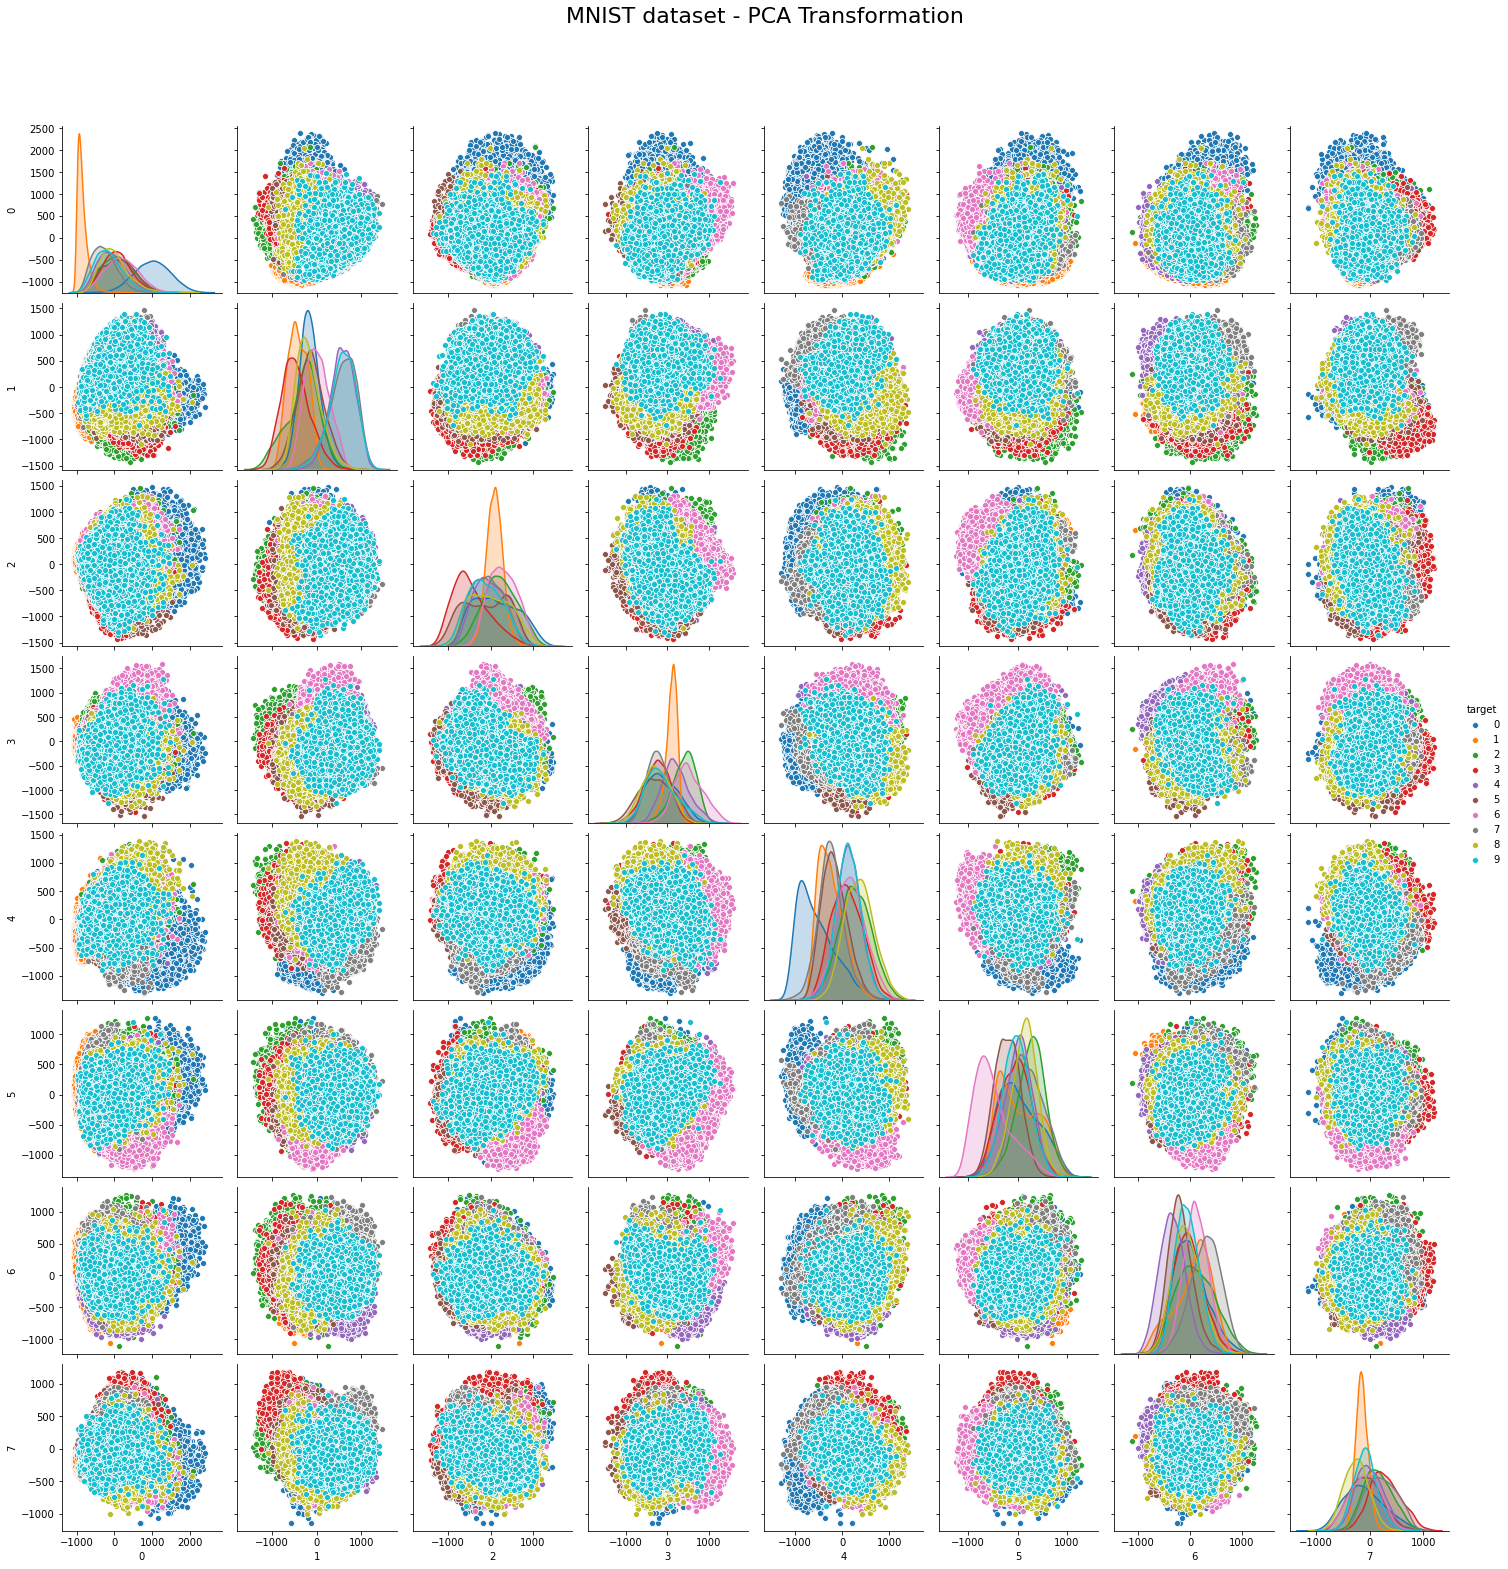

In [5]:
mnist_pca = pd.DataFrame.from_records(X_pca[:, :8])
mnist_pca['target'] = y
g = sns.pairplot(mnist_pca, hue="target")
g.fig.suptitle(f"MNIST dataset - PCA Transformation", y=1.08, fontsize=22);

In [6]:
X_pca_inv = pca.inverse_transform(X_pca)

X_pca_inv.shape

(70000, 784)

## LDA Transformation
This is the pairplot of the first 8 dimensions of the MNIST dataset from Sci-Kit Learn after applying LDA.

In [7]:
lda = LinearDiscriminantAnalysis(random_state=42, n_components=n_dimensions)
X_lda = lda.fit_transform(X, y, verbose=True)

X_lda.shape

Targets were provided: using the labeled data.

Mu:
[[  0.       0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.       0.       0.0018   0.0067   0.0031   0.0001
    0.       0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.       0.       0.       0.       0.       0.
    0.0002   0.0013   0.0113   0.0231   0.0432   0.0622   0.1179   0.1712
    0.1934   0.1901   0.2063   0.1827   0.1701   0.1445   0.0992   0.0682
    0.0489   0.0183   0.0086   0.003    0.       0.       0.       0.
    0.       0.       0.0009   0.0006   0.006    0.0109   0.0563   0.1394
    0.2682   0.521    0.9166   1.4125   2.0055   2.6448   3.2949   3.6582
    3.6887   3.3026   2.7046   1.9718   1.1747   0.608    0.2864   0.0918
    0.0303   0.0074   0.       0.       0.       0.       0.0028   0.005
    0.0132   0.0703   0.2188   0.5492   1.1733   2.2705   3.782    5.6468
    7.6889   9.9488  11.987   13.2303  12.9729  11.5404   9.3011   6.6749
   

Mu_c[1]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.0396   0.0645   0.009    0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.0109   0.0507   0.1085   0.2062   0.2912   0.3518
   0.2078   0.0611   0.0229   0.0321   0.0076   0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.0053   0.0013
   0.       0.       0.       0.0037   0.0042   0.05     0.0966   0.2143
   0.4739   1.2345   1.7018   1.7856   1.446    1.2817   1.0042   0.742
   0.3958   0.2239   0.1108   0.0185   0.       0.       0.       0.
   0.     

Mu_c[6]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.0169   0.0369   0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.0023   0.008    0.081    0.2096   0.3656   0.5609   1.1121   1.6207
   1.8749   1.8339   1.8519   1.587    1.3867   1.3301   0.9999   0.6946
   0.4975   0.1864   0.088    0.0308   0.       0.       0.       0.
   0.       0.       0.0093   0.0019   0.0592   0.051    0.3714   1.0481
   2.1126   4.0652   7.306   11.4414  16.6994  22.7257  28.8758  32.5084
  33.7081  31.1763  26.1811  19.2593  11.5899   6.0606   2.8495   0.8921
   0.2574   0.0513   0.       0.       0.       0.       0.0205   0.0346
   0.0718   0.2293   0.7839   2.2102   4.6342   9.0416  15.7666  24.308
  34.8162  48.6805  64.3982  76.445   79.9689  75.732   64.8223  47.5892
  29.0429  15.4298   7.2602   2.7424   1.0855   0.2032   0.0413

S_intra:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

S_inter:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Singular values:
Singular value 1: 	23.72%   	3.83105  	 Accepted
Singular value 2: 	20.35%   	3.28645  	 Accepted
Singular value 3: 	17.73%   	2.86456  	 Accepted
Singular value 4: 	10.70%   	1.72874  	 Accepted
Singular value 5: 	9.44%    	1.52483  	 Accepted
Singular value 6: 	6.91%    	1.11566  	 Accepted
Singular value 7: 	5.01%    	0.809705 	 Accepted
Singular value 8: 	3.45%    	0.556763 	 Accepted
Singular value 9: 	2.69%    	0.434546 	 Accepted
Singular value 10: 	0.00%    	1.01996e-14 	 Rejected
Singular value 11: 	0.00%    	1.01996e-14 	 Rejected
Singular value 12: 	0.00%    	8.82308e-15 	 Rejected
Singular value 13: 	0.00%    	8.41812e-15 	 Rejecte

W:
[[ 0.      0.      0.     ...  0.0269 -0.0107  0.0234]
 [ 0.      0.      0.     ...  0.0915  0.0133 -0.0502]
 [ 0.      0.      0.     ...  0.0039  0.0627 -0.0297]
 ...
 [ 0.      0.      0.     ...  0.0295 -0.0307 -0.0143]
 [ 0.      0.      0.     ... -0.0107  0.0112  0.0008]
 [ 0.      0.      0.     ... -0.0066  0.0046  0.0198]]



(70000, 9)

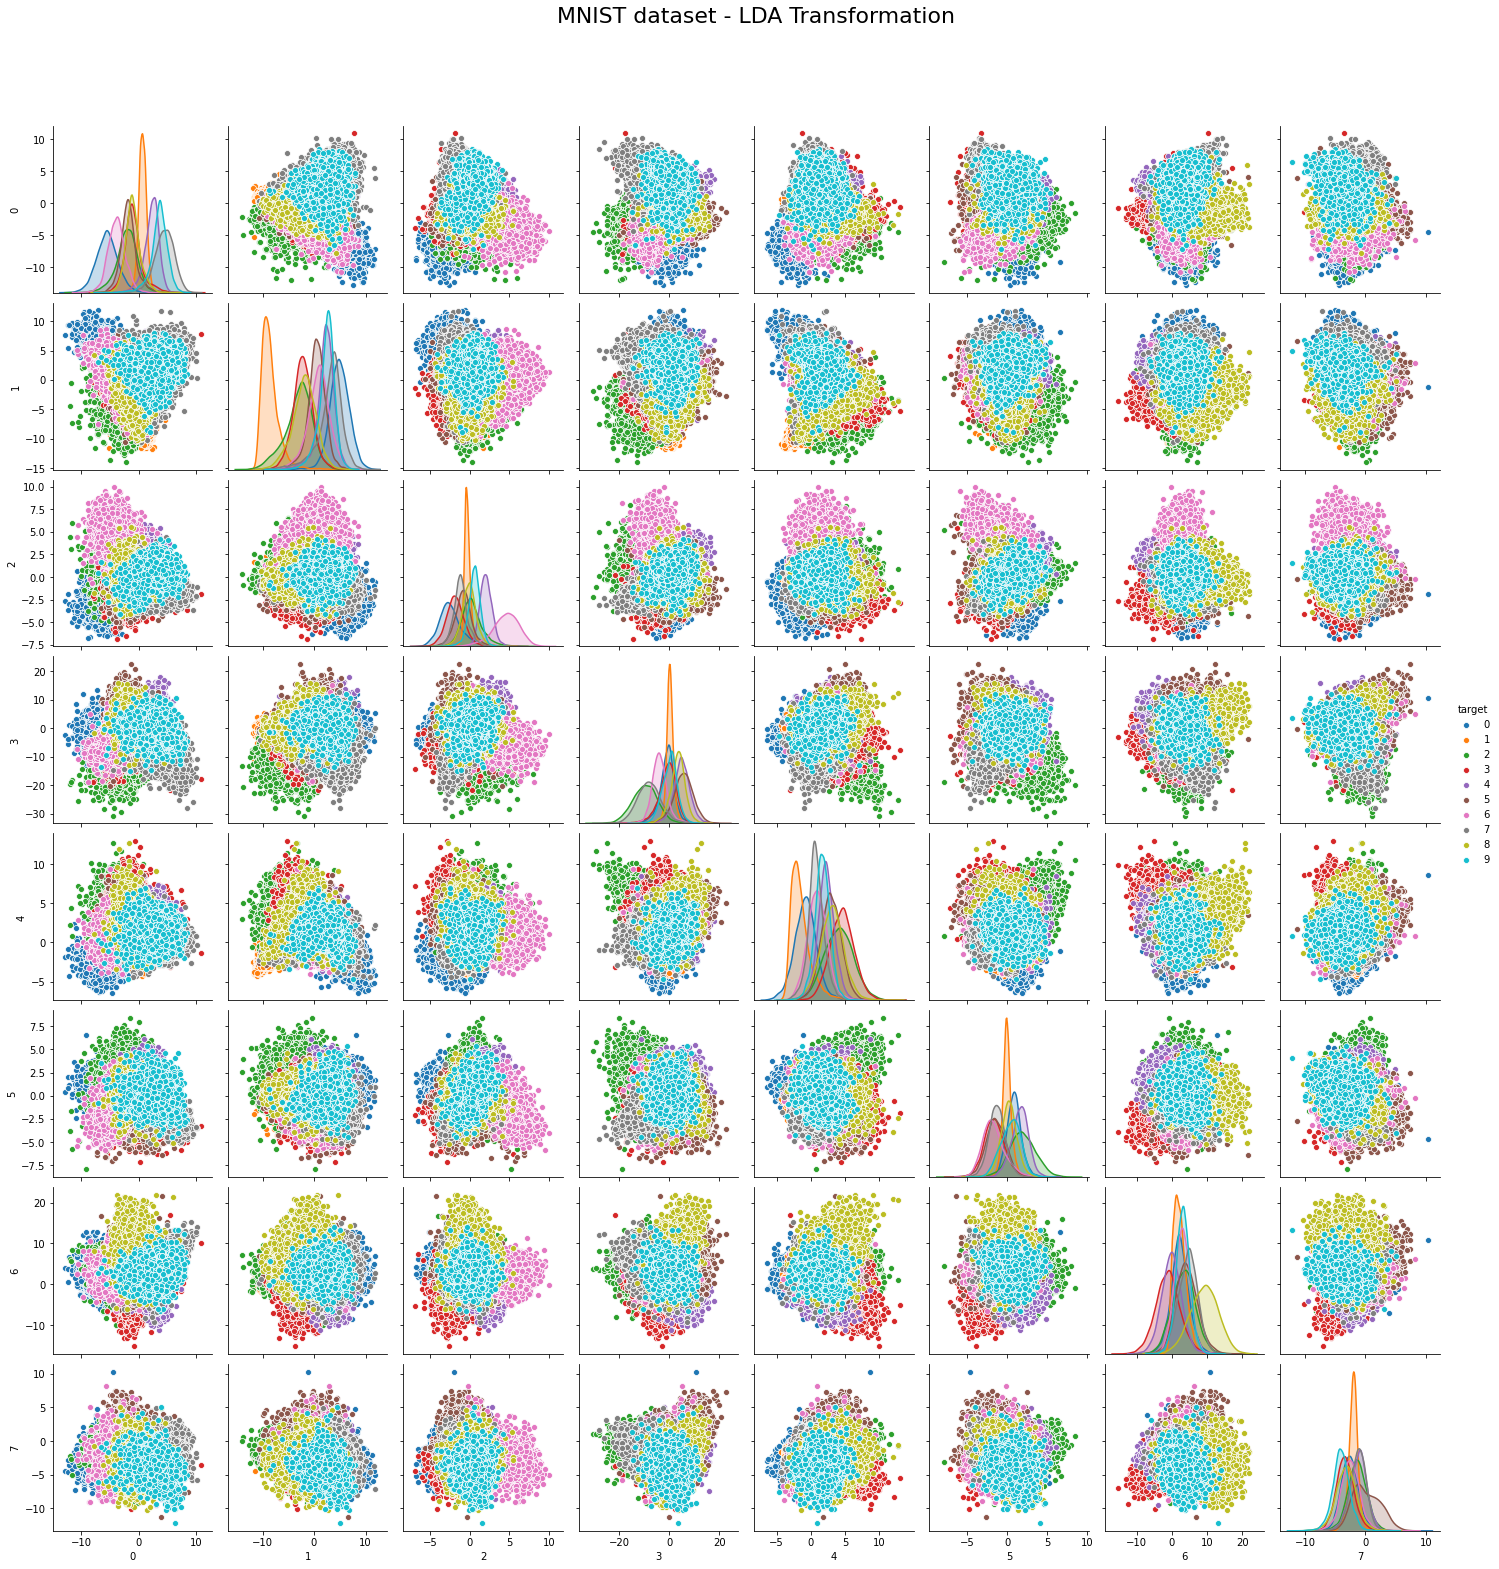

In [8]:
mnist_lda = pd.DataFrame.from_records(X_lda[:, :8])
mnist_lda['target'] = y
g = sns.pairplot(mnist_lda, hue="target")
g.fig.suptitle(f"MNIST dataset - LDA Transformation", y=1.08, fontsize=22);

In [9]:
X_lda_inv = lda.inverse_transform(X_lda, verbose=True)

X_lda_inv.shape

Reverse tranformation after dimensionality reduction may yield unexpected results: 9 dim. -> 784 dim.


(70000, 784)

## Unsupervised LDA Transformation
This is the pairplot of the first 8 dimensions of the MNIST dataset from Sci-Kit Learn after applying Unsupervised LDA.

In [10]:
ulda = LinearDiscriminantAnalysis(random_state=42, n_components=n_dimensions, covariance_type='spherical')
X_ulda = ulda.fit_transform(X, min_clusters=145, max_clusters=150, verbose=True)

X_ulda.shape

No target is provided: using unsupervised clustering.

Searching for an optimal number of clusters between 145 and 150...

145 clusters: 	AIC: 574412241.422, 	BIC: 575455770.137  
146 clusters: 	AIC: 574355470.473, 	BIC: 575406196.001  
147 clusters: 	AIC: 574332719.260, 	BIC: 575390641.601  
148 clusters: 	AIC: 574275314.491, 	BIC: 575340433.646  
149 clusters: 	AIC: 574379303.118, 	BIC: 575451619.085  
150 clusters: 	AIC: 574310021.930, 	BIC: 575389534.710  
Optimal number of clusters found: 148

Predicting the classes from the clusters...

Mu:
[[  0.       0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.       0.       0.0018   0.0067   0.0031   0.0001
    0.       0.       0.       0.       0.       0.       0.       0.
    0.       0.       0.       0.       0.       0.       0.       0.
    0.0002   0.0013   0.0113   0.0231   0.0432   0.0622   0.1179   0.1712
    0.1934   0.1901   0.2063   0.1827   0.1701   0.1445   0.0992   0.0682
    0.0489   0.

Mu_c[22]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0. 

Mu_c[46]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.0176   0.5475   2.0317   2.4331   0.8556   0.4102
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.      

Mu_c[70]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0. 

Mu_c[94]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0. 

Mu_c[118]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.

Mu_c[142]:
[  0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.2285   0.4251   0.0112   0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.

S_intra:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

S_inter:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Singular values:
Singular value 1: 	10.66%   	7.86058  	 Accepted
Singular value 2: 	8.95%    	6.60097  	 Accepted
Singular value 3: 	6.41%    	4.7262   	 Accepted
Singular value 4: 	6.09%    	4.49025  	 Accepted
Singular value 5: 	4.94%    	3.64519  	 Accepted
Singular value 6: 	4.67%    	3.44029  	 Accepted
Singular value 7: 	4.03%    	2.9709   	 Accepted
Singular value 8: 	3.34%    	2.46448  	 Accepted
Singular value 9: 	3.00%    	2.21432  	 Accepted
Singular value 10: 	2.58%    	1.90344  	 Accepted
Singular value 11: 	2.18%    	1.60899  	 Accepted
Singular value 12: 	2.11%    	1.55354  	 Accepted
Singular value 13: 	2.03%    	1.499    	 Accepted
Singular v

W:
[[ 0.      0.      0.     ...  0.0269 -0.0107  0.0234]
 [ 0.      0.      0.     ...  0.0915  0.0133 -0.0502]
 [ 0.      0.      0.     ...  0.0039  0.0627 -0.0297]
 ...
 [ 0.      0.      0.     ...  0.0295 -0.0307 -0.0143]
 [ 0.      0.      0.     ... -0.0107  0.0112  0.0008]
 [ 0.      0.      0.     ... -0.0066  0.0046  0.0198]]



(70000, 9)

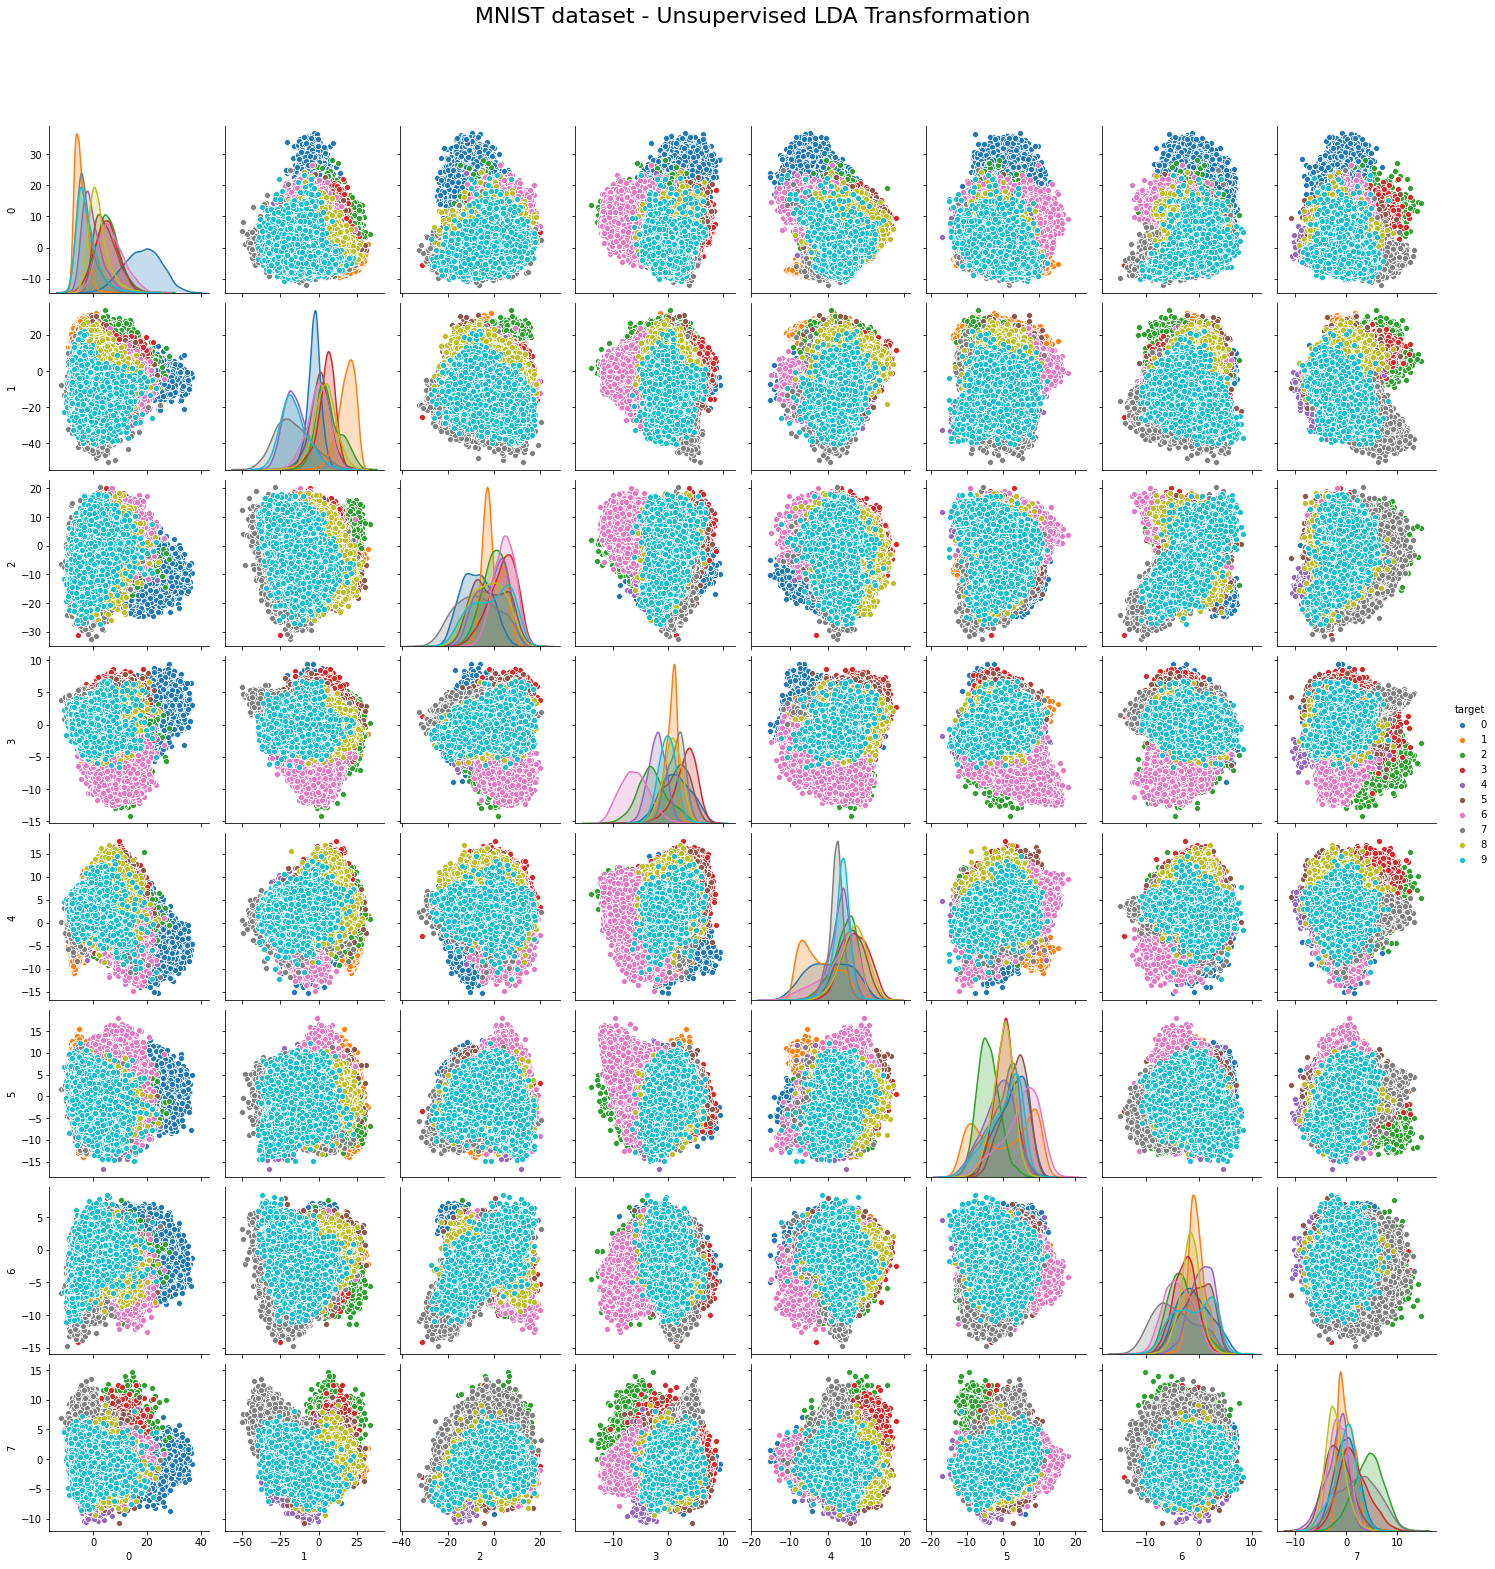

In [11]:
mnist_ulda = pd.DataFrame.from_records(X_ulda[:, :8])
mnist_ulda['target'] = y
g = sns.pairplot(mnist_ulda, hue="target")
g.fig.suptitle(f"MNIST dataset - Unsupervised LDA Transformation", y=1.08, fontsize=22);

In [12]:
X_ulda_inv = ulda.inverse_transform(X_ulda, verbose=True)

X_ulda_inv.shape

Reverse tranformation after dimensionality reduction may yield unexpected results: 9 dim. -> 784 dim.


(70000, 784)

## Comparison

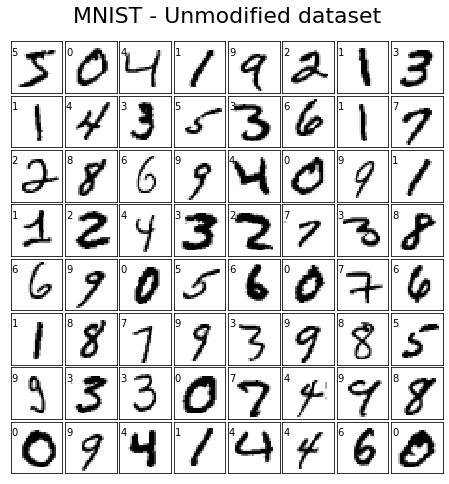

In [13]:
print_mnist(X, y, title="MNIST - Unmodified dataset")

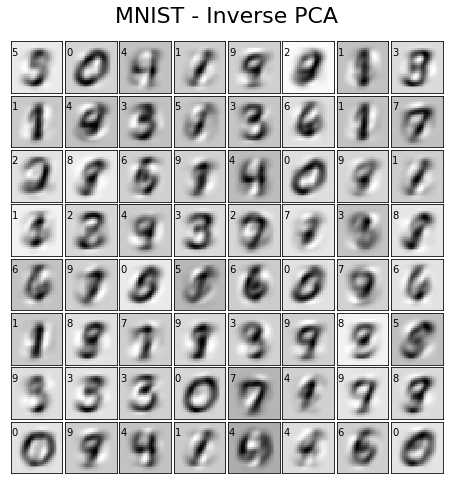

In [14]:
print_mnist(X_pca_inv, y, title="MNIST - Inverse PCA")

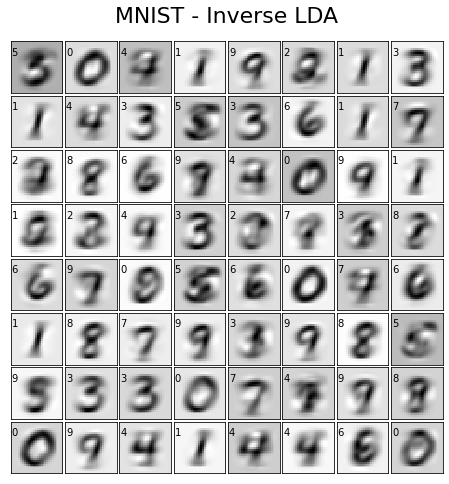

In [15]:
print_mnist(X_lda_inv, y, title="MNIST - Inverse LDA")

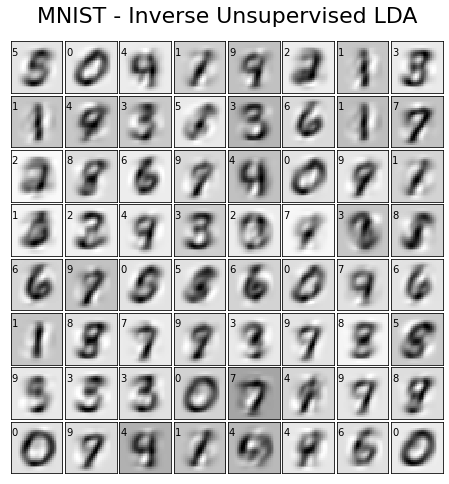

In [16]:
print_mnist(X_ulda_inv, y, title="MNIST - Inverse Unsupervised LDA")

In [17]:
gnb = GaussianNB()
res_original = np.mean(cross_val_score(gnb, X, y, cv=5, scoring='accuracy'))
res_pca = np.mean(cross_val_score(gnb, X_pca, y, cv=5, scoring='accuracy'))
res_lda = np.mean(cross_val_score(gnb, X_lda, y, cv=5, scoring='accuracy'))
res_ulda = np.mean(cross_val_score(gnb, X_ulda, y, cv=5, scoring='accuracy'))
print(f"Prediction score with Naive Bayes:\n"
      f" - Original dataset                   : {res_original:.2%}\n"
      f" - PCA transformation                 : {res_pca:.2%}\n"
      f" - LDA transformation                 : {res_lda:.2%}\n"
      f" - Unsupervised LDA transformation    : {res_ulda:.2%}\n")

Prediction score with Naive Bayes:
 - Original dataset                   : 55.66%
 - PCA transformation                 : 76.12%
 - LDA transformation                 : 88.15%
 - Unsupervised LDA transformation    : 76.85%



In [18]:
dtc = DecisionTreeClassifier(max_depth=9, random_state=42)
res_original = np.mean(cross_val_score(dtc, X, y, cv=5, scoring='accuracy'))
res_pca = np.mean(cross_val_score(dtc, X_pca, y, cv=5, scoring='accuracy'))
res_lda = np.mean(cross_val_score(dtc, X_lda, y, cv=5, scoring='accuracy'))
res_ulda = np.mean(cross_val_score(dtc, X_ulda, y, cv=5, scoring='accuracy'))
print(f"Prediction score with a Decision Tree Classifier:\n"
      f" - Original dataset                   : {res_original:.2%}\n"
      f" - PCA transformation                 : {res_pca:.2%}\n"
      f" - LDA transformation                 : {res_lda:.2%}\n"
      f" - Unsupervised LDA transformation    : {res_ulda:.2%}\n")

Prediction score with a Decision Tree Classifier:
 - Original dataset                   : 83.74%
 - PCA transformation                 : 75.30%
 - LDA transformation                 : 84.39%
 - Unsupervised LDA transformation    : 76.35%



In [19]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='tanh', max_iter=250, alpha=0.01, solver='sgd', 
                    verbose=False, random_state=42, learning_rate_init=.01, early_stopping=True)
res_original = np.mean(cross_val_score(mlp, X, y, cv=5, scoring='accuracy'))
res_pca = np.mean(cross_val_score(mlp, X_pca, y, cv=5, scoring='accuracy'))
res_lda = np.mean(cross_val_score(mlp, X_lda, y, cv=5, scoring='accuracy'))
res_ulda = np.mean(cross_val_score(mlp, X_ulda, y, cv=5, scoring='accuracy'))
print(f"Prediction score with a Multilayer Perceptron Classifier:\n"
      f" - Original dataset                   : {res_original:.2%}\n"
      f" - PCA transformation                 : {res_pca:.2%}\n"
      f" - LDA transformation                 : {res_lda:.2%}\n"
      f" - Unsupervised LDA transformation    : {res_ulda:.2%}\n")

Prediction score with a Multilayer Perceptron Classifier:
 - Original dataset                   : 85.21%
 - PCA transformation                 : 87.12%
 - LDA transformation                 : 91.86%
 - Unsupervised LDA transformation    : 89.26%



## Visualization of the centroids

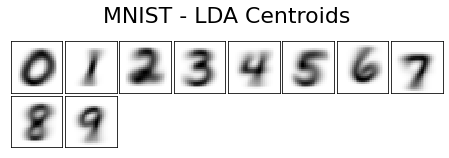

In [20]:
print_mnist(lda.mu_c_, title="MNIST - LDA Centroids")

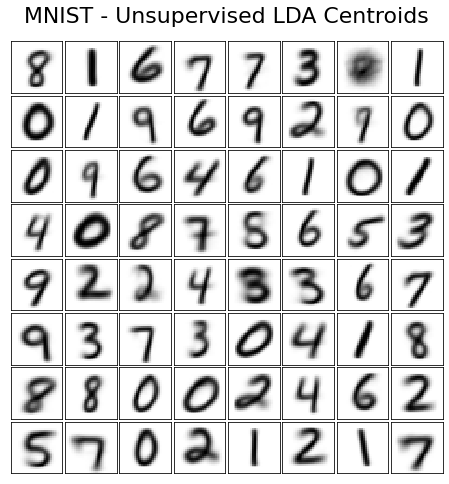

In [21]:
print_mnist(ulda.mu_c_, title="MNIST - Unsupervised LDA Centroids")